In [1]:
import scanpy as sc
import anndata as ad

In [2]:
import pandas as pd

In [3]:
# first looking at one sample, just to get a feel for the data
p1_dir = "/rds/general/user/ztb25/home/PBMC_datasets/1/GSE223138_RAW/16/"

adata1 = sc.read_10x_mtx(
    p1_dir,
    var_names="gene_symbols",
    cache=True
)
adata1.var_names_make_unique()


In [4]:
print(adata1)
# this means we have 12190 cells and 33694 genes in this sample. The data is stored in the .X attribute, which is a sparse matrix of shape (n_cells, n_genes) containing the UMI counts for each gene in each cell. The .obs attribute contains the cell metadata, and the .var attribute contains the gene metadata.

AnnData object with n_obs × n_vars = 12190 × 36601
    var: 'gene_ids', 'feature_types'


In [5]:
display(adata1.obs.head())
# cell metadata, each row is a cell (barcode)
# gets populated after doing calculate_qc_metrics
# specifically: n_genes_by_counts — how many unique genes were detected in that cell; total_counts — total UMI count for that cell (library size) and pct_counts_mt — percentage of counts coming from mitochondrial genes
# (and later on, after doing clustering and annotation)
display(adata1.var.head()) 
# gene metadata, each row is a gene
# after qc gains the following columns: n_cells_by_counts — how many cells express that gene; mean_counts, total_counts — expression summaries across all cells; mt — the boolean column you added to flag mitochondrial genes

""
AAACCTGAGACTACAA-1
AAACCTGAGAGCTGCA-1
AAACCTGAGATCACGG-1
AAACCTGAGGATTCGG-1
AAACCTGAGGTCGGAT-1


,gene_ids,feature_types
MIR1302-2HG,ENSG00000243485,Gene Expression
FAM138A,ENSG00000237613,Gene Expression
OR4F5,ENSG00000186092,Gene Expression
AL627309.1,ENSG00000238009,Gene Expression
AL627309.3,ENSG00000239945,Gene Expression


In [6]:
pd.DataFrame(
    adata1.X[:10, :20].toarray(),
    index=adata1.obs_names[:10],
    columns=adata1.var_names[:20]
)

,MIR1302-2HG,FAM138A,OR4F5,AL627309.1,AL627309.3,AL627309.2,AL627309.5,AL627309.4,AP006222.2,AL732372.1,OR4F29,AC114498.1,OR4F16,AL669831.2,LINC01409,FAM87B,LINC01128,LINC00115,FAM41C,AL645608.6
AAACCTGAGACTACAA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGAGAGCTGCA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGAGATCACGG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGAGGATTCGG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGAGGTCGGAT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGAGGTGACCA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGCAACGATGG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGCACAACTGT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGCACAGATTC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGCACGTGAGA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# mitochondrial genes
adata1.var["mt"] = adata1.var_names.str.startswith("MT-") 
#MT- genes indicate mitochondrial genes, not “mitochondrial cells.” We use them to estimate mitochondrial RNA fraction per cel
# ribosomal genes
adata1.var["ribo"] = adata1.var_names.str.startswith(("RPS", "RPL"))
# hemoglobin genes.
adata1.var["hb"] = adata1.var_names.str.contains("^HB[^(P)]")

In [8]:
sc.pp.calculate_qc_metrics(
    adata1, qc_vars=["mt", "ribo", "hb"], inplace=True, percent_top=[20], log1p=True
)
adata1

AnnData object with n_obs × n_vars = 12190 × 36601
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb'
    var: 'gene_ids', 'feature_types', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

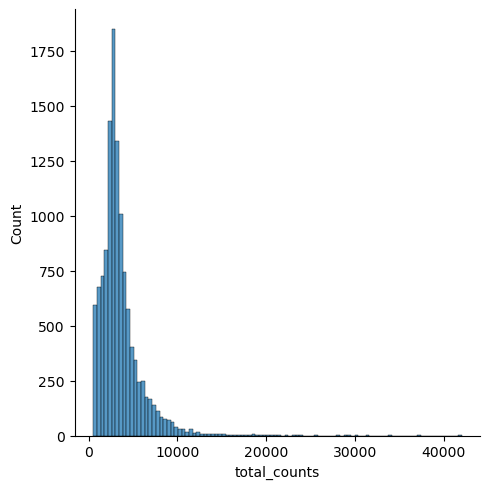

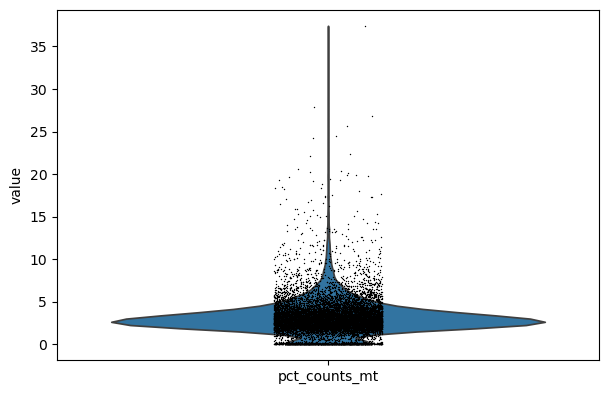

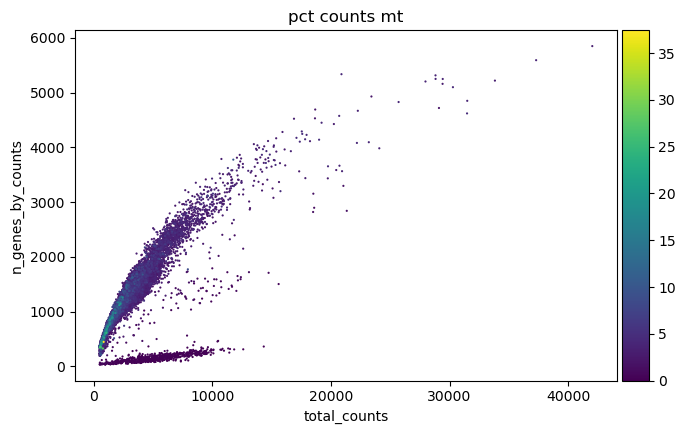

In [9]:
import seaborn as sns
p1 = sns.displot(adata1.obs["total_counts"], bins=100, kde=False)
p2 = sc.pl.violin(adata1, "pct_counts_mt")
p3 = sc.pl.scatter(adata1, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

In [10]:
# now combining the samples to actually run QC globally

samples = {
    "sample1": "/rds/general/user/ztb25/home/PBMC_datasets/1/GSE223138_RAW/16/",
    "sample2": "/rds/general/user/ztb25/home/PBMC_datasets/1/GSE223138_RAW/17/",
    "sample3": "/rds/general/user/ztb25/home/PBMC_datasets/1/GSE223138_RAW/19/",
    "sample4": "/rds/general/user/ztb25/home/PBMC_datasets/1/GSE223138_RAW/20/",
    "sample5": "/rds/general/user/ztb25/home/PBMC_datasets/1/GSE223138_RAW/25/",
    "sample6": "/rds/general/user/ztb25/home/PBMC_datasets/1/GSE223138_RAW/26/",

}

adatas = {}
for name, path in samples.items():
    adata = sc.read_10x_mtx(path, var_names="gene_symbols", cache=False)
    adata.var_names_make_unique()
    adatas[name] = adata

In [11]:
adatas

{'sample1': AnnData object with n_obs × n_vars = 12190 × 36601
     var: 'gene_ids', 'feature_types',
 'sample2': AnnData object with n_obs × n_vars = 8721 × 36601
     var: 'gene_ids', 'feature_types',
 'sample3': AnnData object with n_obs × n_vars = 15268 × 36601
     var: 'gene_ids', 'feature_types',
 'sample4': AnnData object with n_obs × n_vars = 9838 × 36601
     var: 'gene_ids', 'feature_types',
 'sample5': AnnData object with n_obs × n_vars = 10470 × 36601
     var: 'gene_ids', 'feature_types',
 'sample6': AnnData object with n_obs × n_vars = 10339 × 36601
     var: 'gene_ids', 'feature_types'}

In [12]:
adata = ad.concat(adatas, label="sample", merge= "same")
adata.obs_names_make_unique()
adata


/rds/general/user/ztb25/home/miniforge3/envs/m10/lib/python3.11/site-packages/anndata/_core/anndata.py:1796: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 66826 × 36601
    obs: 'sample'
    var: 'gene_ids', 'feature_types'

In [13]:
adata.var.head()

,gene_ids,feature_types
MIR1302-2HG,ENSG00000243485,Gene Expression
FAM138A,ENSG00000237613,Gene Expression
OR4F5,ENSG00000186092,Gene Expression
AL627309.1,ENSG00000238009,Gene Expression
AL627309.3,ENSG00000239945,Gene Expression


In [14]:
# Run QC globally

# Annotate mitochondrial genes
adata.var["mt"] = adata.var_names.str.startswith("MT-")  

sc.pp.calculate_qc_metrics(
    adata,
    qc_vars=["mt"], # should i do ribo and hb here as well?
    percent_top=[20],
    log1p=True,
    inplace=True
)

adata # to check new metadata cols

AnnData object with n_obs × n_vars = 66826 × 36601
    obs: 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

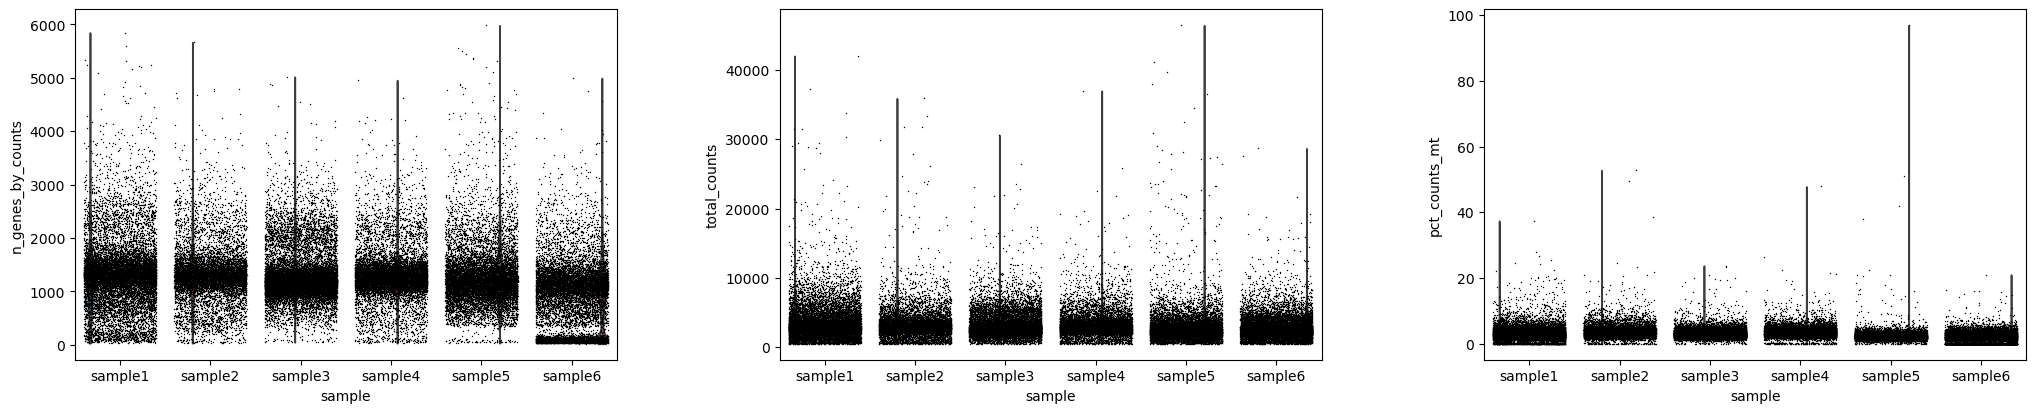

In [15]:
import matplotlib.pyplot as plt

sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    groupby="sample",
    jitter=0.4,
    multi_panel=True
)

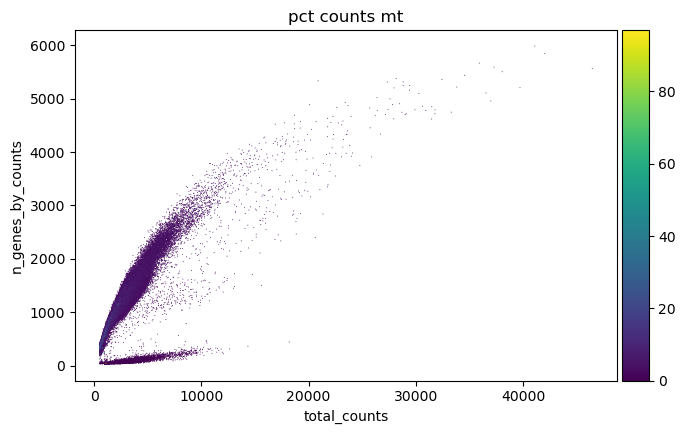

In [16]:
p1 = sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

In [17]:
# n_genes_by_counts in .obs is the number of genes with positive counts in a cell, (corresponds to covariate 2: number of genes)
# total_counts is the total number of counts for a cell, this might also be known as library size (covariate 1: count depth), and
# pct_counts_mt is the proportion of total counts for a cell which are mitochondrial (covariate 3: mitochondrial content).

In [18]:
adata.obs.head()

,sample,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt
AAACCTGAGACTACAA-1,sample1,3230,8.080547,12623.0,9.443355,17.507724,434.0,6.075346,3.438168
AAACCTGAGAGCTGCA-1,sample1,828,6.720220,1370.0,7.223296,21.678832,168.0,5.129899,12.262774
AAACCTGAGATCACGG-1,sample1,1275,7.151485,2321.0,7.750184,19.603619,70.0,4.262680,3.015941
AAACCTGAGGATTCGG-1,sample1,1763,7.475339,4620.0,8.438366,20.259740,183.0,5.214936,3.961039
AAACCTGAGGTCGGAT-1,sample1,1338,7.199678,2828.0,7.947679,19.519095,91.0,4.521789,3.217822


In [19]:
from scipy.stats import median_abs_deviation
import numpy as np

# group by sample (to avoid skewing from bad samples) and flag outliers based on median absolute deviation (MAD).
def is_outlier_per_sample(adata, metric: str, nmads: int):
    outlier = pd.Series(False, index=adata.obs_names)
    
    for sample, group in adata.obs.groupby("sample"):
        M = group[metric]
        is_out = (M < np.median(M) - nmads * median_abs_deviation(M)) | (
            np.median(M) + nmads * median_abs_deviation(M) < M
        )
        outlier[is_out.index] = is_out
    
    return outlier


In [20]:
adata.obs["outlier"] = (
    is_outlier_per_sample(adata, "log1p_total_counts", 5) # log values easier to visalise and compare (raw tota_counts can vary hugely across cells)
    | is_outlier_per_sample(adata, "log1p_n_genes_by_counts", 5)
    | is_outlier_per_sample(adata, "pct_counts_in_top_20_genes", 5) # gives what percentage of total counts comes from the top 20 most highly expressed genes, cells with very high values here are likely to be low quality cells where a few genes dominate the expression profile, which can be a sign of cell stress or damage
)
adata.obs.outlier.value_counts()

outlier
False    59357
True      7469
Name: count, dtype: int64

In [21]:
adata.obs["mt_outlier"] = is_outlier_per_sample(adata, "pct_counts_mt", 3) | (
    adata.obs["pct_counts_mt"] > 8
)
adata.obs.mt_outlier.value_counts()

mt_outlier
False    60946
True      5880
Name: count, dtype: int64

In [22]:
# filter out low quality cells, and check how many cells before and after filtering
print(f"Total number of cells: {adata.n_obs}")
adata = adata[(~adata.obs.outlier) & (~adata.obs.mt_outlier)].copy()
print(f"Number of cells after filtering of low quality cells: {adata.n_obs}")

Total number of cells: 66826
Number of cells after filtering of low quality cells: 55492


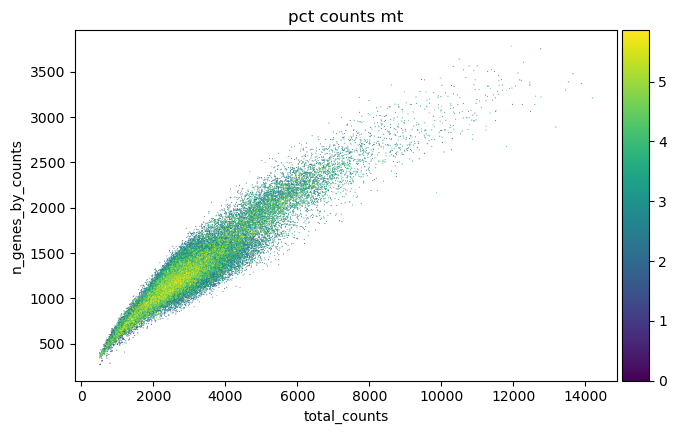

In [23]:
p1 = sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

In [ ]:
# doublet detection

sc.pp.scrublet(adata, expected_doublet_rate=0.05, threshold=0.25, batch_key="sample")

KeyError: ('doublet_score', 'predicted_doublet')

In [ ]:
# inspect number of predicted doublets 
display(adata.obs[['doublet_score','predicted_doublet']])
adata.obs['predicted_doublet'].value_counts()

,doublet_score,predicted_doublet
AAACCTGAGACTACAA-1,0.036795,False
AAACCTGAGATCACGG-1,0.017806,False
AAACCTGAGGATTCGG-1,0.113106,False
AAACCTGAGGTCGGAT-1,0.493333,True
AAACCTGAGGTGACCA-1,0.035844,False
...,...,...
TTTGTCAGTTGATTCG-1,0.030200,False
TTTGTCAGTTTGTTTC-1,0.039643,False
TTTGTCATCAAGATCC-1,0.159059,False
TTTGTCATCAGATAAG-1,0.060507,False


predicted_doublet
False    53854
True      1638
Name: count, dtype: int64

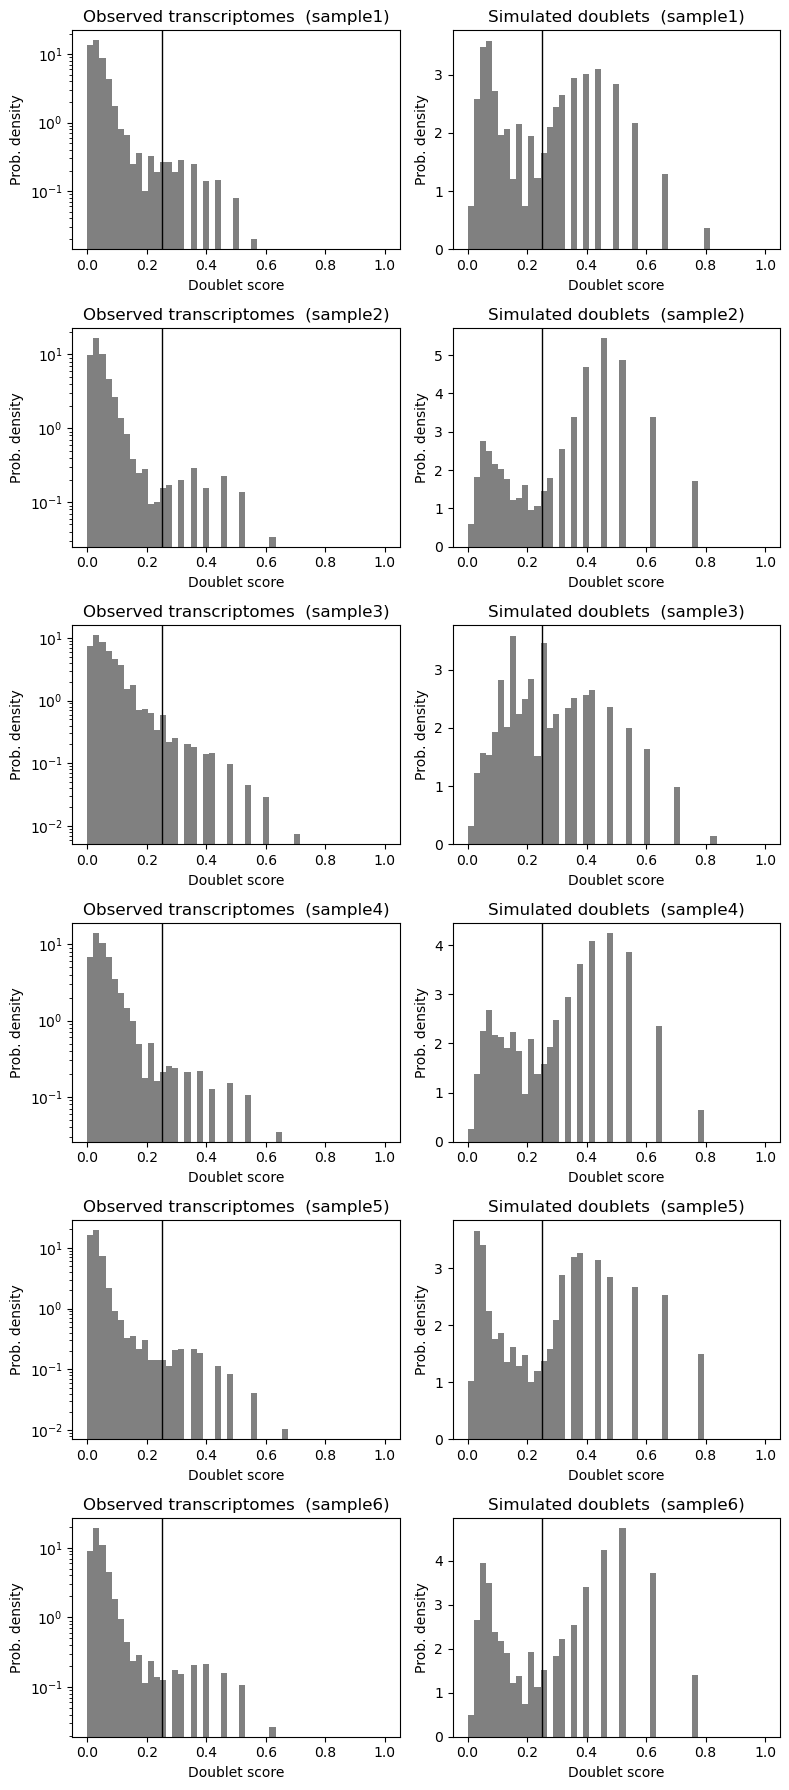

In [28]:
sc.pp.scrublet_simulate_doublets(adata)
sc.pl.scrublet_score_distribution(adata)

In [29]:
# Filter out doublets

adata = adata[~adata.obs['predicted_doublet']].copy()

In [ ]:
# normalisation

